In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [4]:
data_bs1 = pd.read_csv('../data/preprocessed_data_BS1.csv')
data_bs1.head()

,hg38_ASF1A,hg38_CCT7,hg38_EPOR,hg38_NECAP2,hg38_LRRC8A,hg38_NDUFS8,hg38_MRPL22,hg38_HIST1H2BC,hg38_LY96,hg38_UBE2E2-AS1,...,hg38_ASPSCR1,hg38_CDC20,hg38_DNAJB9,hg38_OSTM1,hg38_LCNL1,hg38_PHB,hg38_LRRC29,hg38_ZFP36,Group,Subgroups
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,B,Bmemory
1,0,0,0,3,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,B,Bmemory
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,2,0,3,B,Bmemory
3,0,0,0,0,0,3,0,0,0,0,...,0,0,3,0,0,3,0,0,B,Bmemory
4,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,B,Bmemory


In [5]:
X = data_bs1.drop(['Group', 'Subgroups'], axis=1)
y = data_bs1['Group']

In [6]:
y.unique()

array(['B', 'D', 'M', 'NK', 'T'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [9]:
def model_info(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)
    class_sums = cm.sum(axis=1)
    normalized_conf_matrix = cm / class_sums[:, np.newaxis]
    sns.heatmap(normalized_conf_matrix, annot=True, cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique(), fmt='.2f')
    plt.xlabel('Predvidjene vrednosti')
    plt.ylabel('Stvarne vrednosti')
    plt.title('Matrica konfuzije')
    plt.show()

    print('Matrica konfuzije: \n', cm)
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred, average='weighted', zero_division=0))
    print('Recall score: ', recall_score(y_real, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_real, y_pred, average='weighted'))

In [10]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    model_info(y_test, y_pred)

    return model

In [11]:
from sklearn.ensemble import RandomForestClassifier

model_bs1 = RandomForestClassifier(n_estimators=100, random_state=55)

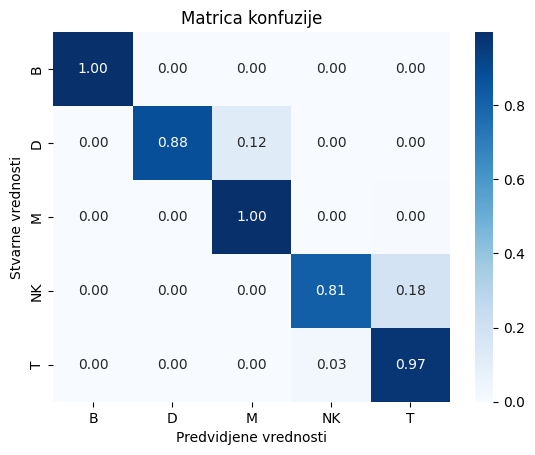

Matrica konfuzije: 
 [[ 516    1    1    0    0]
 [   0   36    5    0    0]
 [   0    0  494    0    2]
 [   1    0    0  319   72]
 [   2    0    1   71 2434]]
Accuracy score:  0.9605562579013907
Precision score:  0.9604559873461571
Recall score:  0.9605562579013907
F1 score:  0.9604771148235505


In [12]:
model_bs1 = build_model(model_bs1, X_train, X_test, y_train, y_test)

In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 15, 30],
}

model = RandomForestClassifier(random_state=55)
grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...criterion=gini, max_depth=None, n_estimators=100; total time=   8.8s
[CV] END ...criterion=gini, max_depth=None, n_estimators=100; total time=   8.6s
[CV] END ...criterion=gini, max_depth=None, n_estimators=100; total time=   8.6s
[CV] END ...criterion=gini, max_depth=None, n_estimators=100; total time=   8.6s
[CV] END ...criterion=gini, max_depth=None, n_estimators=100; total time=   9.2s
[CV] END ...criterion=gini, max_depth=None, n_estimators=200; total time=  17.7s
[CV] END ...criterion=gini, max_depth=None, n_estimators=200; total time=  17.7s
[CV] END ...criterion=gini, max_depth=None, n_estimators=200; total time=  16.9s
[CV] END ...criterion=gini, max_depth=None, n_estimators=200; total time=  17.3s
[CV] END ...criterion=gini, max_depth=None, n_estimators=200; total time=  18.1s
[CV] END ...criterion=gini, max_depth=None, n_estimators=300; total time=  25.2s
[CV] END ...criterion=gini, max_depth=None, n_es

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=300)

In [14]:
best_params, best_score

({'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 300},
 0.9557866272053837)

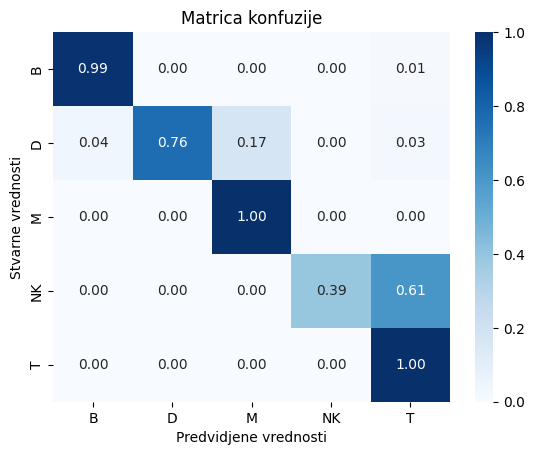

Matrica konfuzije: 
 [[ 584    0    0    0    7]
 [   3   61   14    0    2]
 [   0    0  596    0    0]
 [   0    0    0  106  164]
 [   2    0    1    0 2104]]
Accuracy score:  0.9470362239297475
Precision score:  0.9506771099183694
Recall score:  0.9470362239297475
F1 score:  0.9378291290541773

--------------------------------------



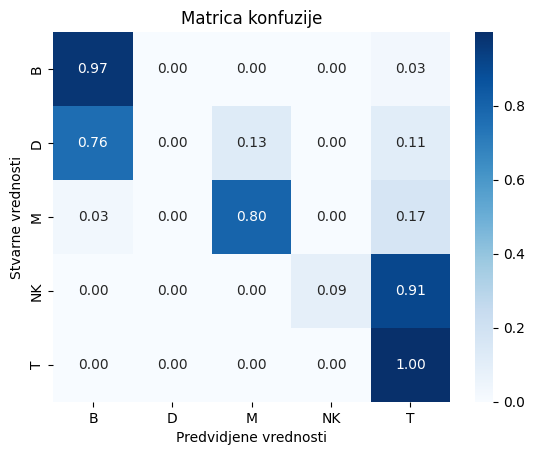

Matrica konfuzije: 
 [[1823    0    0    0   54]
 [ 206    0   34    0   30]
 [  68    0 1601    0  337]
 [   0    0    0   76  766]
 [   9    0    1    1 7140]]
Accuracy score:  0.8760085624897086
Precision score:  0.8686447131360534
Recall score:  0.8760085624897086
F1 score:  0.8413150967735212


In [16]:
data_bs2 = pd.read_csv('../data/preprocessed_data_BS2.csv')

X = data_bs2.drop(['Group', 'Subgroups'], axis=1)
y = data_bs2['Group']

X_train_bs2, X_test_bs2, y_train_bs2, y_test_bs2 = train_test_split(X, y, test_size=0.3, random_state=55)

model_bs2 = build_model(best_model, X_train_bs2, X_test_bs2, y_train_bs2, y_test_bs2)
print('\n--------------------------------------\n')

X_test_data = data_bs2.drop(['Group', 'Subgroups'], axis=1)
y_test_data = data_bs2['Group']

test_model = best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test_data)
model_info(y_test_data, y_pred)

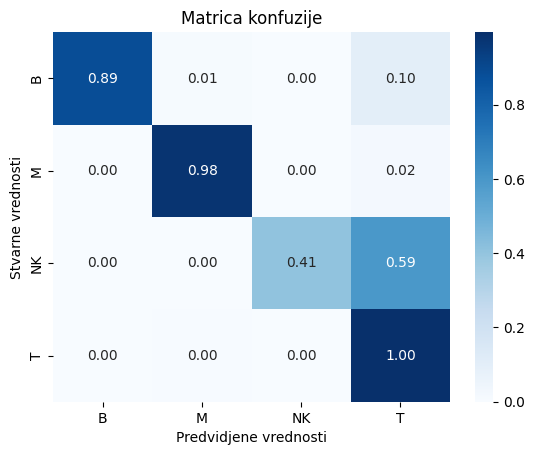

Matrica konfuzije: 
 [[ 457    6    0   53]
 [   0  257    0    6]
 [   0    0   32   47]
 [   1   18    0 4045]]
Accuracy score:  0.97338480292564
Precision score:  0.9741227879591265
Recall score:  0.97338480292564
F1 score:  0.9712355392941214

--------------------------------------



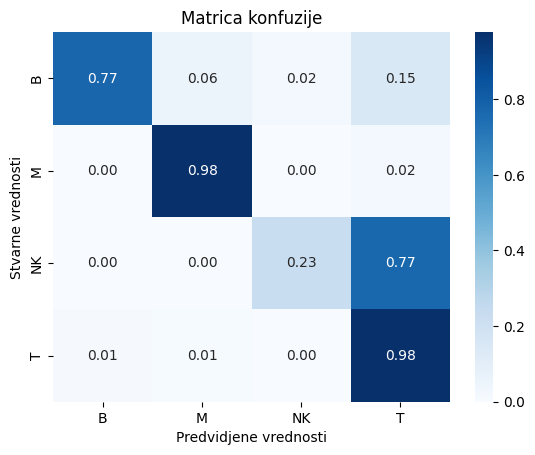

Matrica konfuzije: 
 [[ 1359   102    37   258]
 [    2   836     0    18]
 [    0     0    71   238]
 [  165   108    32 13179]]
Accuracy score:  0.9414812557147211
Precision score:  0.937673111898421
Recall score:  0.9414812557147211
F1 score:  0.9376469726800609


In [17]:
data_geo = pd.read_csv('../data/preprocessed_data_GEO.csv')

X = data_geo.drop(['Group', 'Subgroups'], axis=1)
y = data_geo['Group']

X_train_geo, X_test_geo, y_train_geo, y_test_geo = train_test_split(X, y, test_size=0.3, random_state=55)

model_geo = build_model(best_model, X_train_geo, X_test_geo, y_train_geo, y_test_geo)
print('\n--------------------------------------\n')

X_test_data = data_geo.drop(['Group', 'Subgroups'], axis=1)
y_test_data = data_geo['Group']

test_model = best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test_data)
model_info(y_test_data, y_pred)

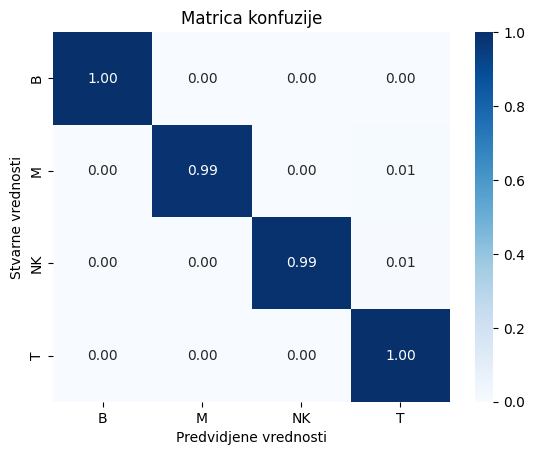

Matrica konfuzije: 
 [[ 2951     0     0     0]
 [    2   530     0     5]
 [    0     1  2398    18]
 [    3     2     2 18817]]
Accuracy score:  0.9986655343928181
Precision score:  0.9986651829651654
Recall score:  0.9986655343928181
F1 score:  0.9986636232932213

--------------------------------------



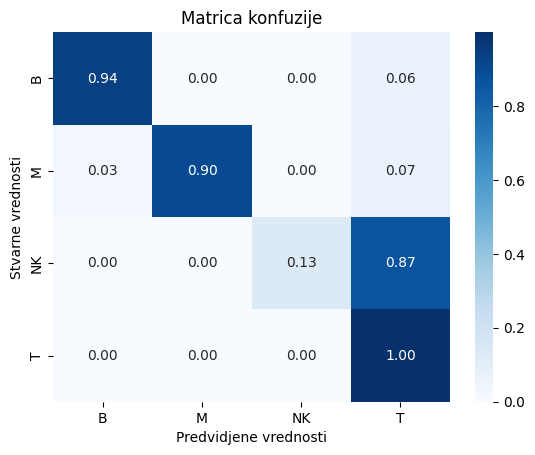

Matrica konfuzije: 
 [[ 9113     0     0   612]
 [   51  1660     0   137]
 [    0     0  1102  7077]
 [   29     2     1 62644]]
Accuracy score:  0.9040495947978842
Precision score:  0.9144136571503655
Recall score:  0.9040495947978842
F1 score:  0.8739302494245847


In [18]:
data_10x = pd.read_csv('../data/preprocessed_data_10x.csv')

X = data_10x.drop(['Group', 'Subgroups'], axis=1)
y = data_10x['Group']

X_train_10x, X_test_10x, y_train_10x, y_test_10x = train_test_split(X, y, test_size=0.3, random_state=55)

model_10x = build_model(best_model, X_train_10x, X_test_10x, y_train_10x, y_test_10x)
print('\n--------------------------------------\n')

X_test_data = data_10x.drop(['Group', 'Subgroups'], axis=1)
y_test_data = data_10x['Group']

test_model = best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test_data)
model_info(y_test_data, y_pred)